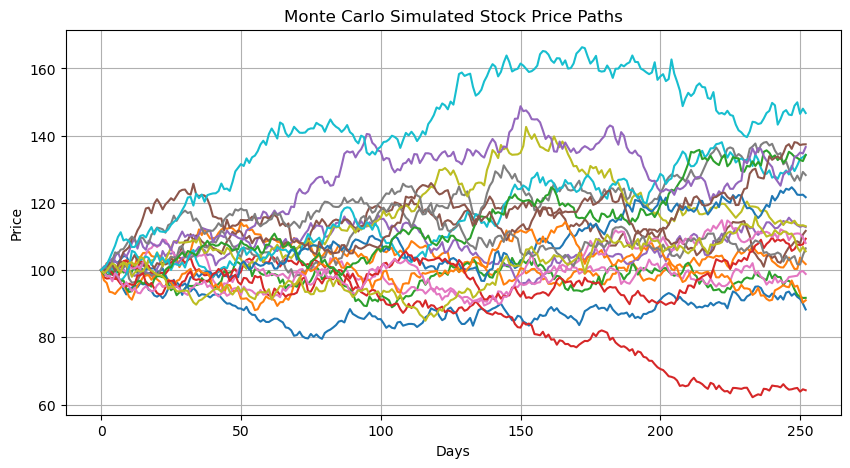

1. Mean Price: 105.23
2. Median Price: 103.32
3. Standard Deviation: 21.46
4. Variance: 460.68
5. Min Price: 47.94
6. Max Price: 249.65
7. Percentiles (5th, 25th, 75th, 95th): [ 73.91779788  89.93290399 118.33326738 143.29203812]
8. Skewness: 0.61
9. Probability of Loss > 10%: 25.15%
10. Value at Risk (5%): 26.08
95% Confidence Interval for Mean: (104.81106992174773, 105.65242119723246)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, norm

# Parameters
S0 = 100        # initial stock price
r = 0.05        # risk-free interest rate
sigma = 0.2     # volatility
T = 1           # time in years
steps = 252     # trading days
n_simulations = 10000  # number of Monte Carlo iterations

# Storage for final prices
final_prices = []

# Simulation
dt = T / steps

plt.figure(figsize=(10, 5))
for sim in range(n_simulations):
    prices = [S0]
    for step in range(steps):
        z = np.random.normal(0, 1)
        S_next = prices[-1] * np.exp((r - 0.5 * sigma**2) * dt +
                                     sigma * np.sqrt(dt) * z)
        prices.append(S_next)
    
    final_prices.append(prices[-1])  # store final price
    if sim < 20:  # plot only first 20 paths for clarity
        plt.plot(prices)

plt.title("Monte Carlo Simulated Stock Price Paths")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid(True)
plt.show()

final_prices = np.array(final_prices)

# Statistics
mean_price = np.mean(final_prices)
median_price = np.median(final_prices)
std_dev = np.std(final_prices)
variance = np.var(final_prices)
min_price = np.min(final_prices)
max_price = np.max(final_prices)
percentiles = np.percentile(final_prices, [5, 25, 75, 95])
skewness_value = skew(final_prices)

# 95% Confidence Interval for the Mean
conf_level = 0.95
z_score = norm.ppf((1 + conf_level) / 2)
margin_error = z_score * std_dev / np.sqrt(n_simulations)
conf_interval = (mean_price - margin_error, mean_price + margin_error)

# Probability of loss > 10%
prob_loss_10 = np.mean(final_prices < S0 * 0.9)

# Value at Risk (VaR) at 5% level
VaR_5 = S0 - np.percentile(final_prices, 5)

# --- Print results ---
print(f"1. Mean Price: {mean_price:.2f}")
print(f"2. Median Price: {median_price:.2f}")
print(f"3. Standard Deviation: {std_dev:.2f}")
print(f"4. Variance: {variance:.2f}")
print(f"5. Min Price: {min_price:.2f}")
print(f"6. Max Price: {max_price:.2f}")
print(f"7. Percentiles (5th, 25th, 75th, 95th): {percentiles}")
print(f"8. Skewness: {skewness_value:.2f}")
print(f"9. Probability of Loss > 10%: {prob_loss_10:.2%}")
print(f"10. Value at Risk (5%): {VaR_5:.2f}")
print(f"95% Confidence Interval for Mean: {conf_interval}")